In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("Set2")

Config parameters:

In [69]:
# Path to datasets
train_dataset_name = '../../data/raw/teco-psda-exercisesheet1-credit-2024/credit_train.csv'
test_dataset_name = '../../data/raw/teco-psda-exercisesheet1-credit-2024/credit_test.csv'

# Target directory for saving
target_dir = '../../data/processed/teco-psda-exercisesheet1-credit-2024/'

## Load Data

In [70]:
df_train = pd.read_csv(train_dataset_name)
df_test = pd.read_csv(test_dataset_name)

print(df_test.columns)
print(df_train.columns)

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity'],
      dtype='object')
Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')


## Preprocess dataset:
1) Create dataset with dummy-encoding <br>
2) Feature distribution <br>
3) Remove highly uncorrelated features <br>


In [71]:
print("Sum of Nan values for each feature:", "*"*25, df_train.isnull().sum(), sep="\n")
print("Sum of Nan values for each feature:", "*"*25, df_test.isnull().sum(), sep="\n")

Sum of Nan values for each feature:
*************************
Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64
Sum of Nan values for each feature:
*************************
Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
dtype: int64


Findings: There are no NaN values regarding the train and test features.

In [72]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  350 non-null    int64  
 1   Income      350 non-null    float64
 2   Limit       350 non-null    int64  
 3   Rating      350 non-null    int64  
 4   Cards       350 non-null    int64  
 5   Age         350 non-null    int64  
 6   Education   350 non-null    int64  
 7   Gender      350 non-null    object 
 8   Student     350 non-null    object 
 9   Married     350 non-null    object 
 10  Ethnicity   350 non-null    object 
 11  Balance     350 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 32.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   Income      50 non-null    

Findings: The train data consists of
* 5 integer columns 
* 4 categorical columns
* 1 floating point column

In [73]:
print(str(df_train.describe()) + '\n')
print(df_test.describe())

       Unnamed: 0      Income         Limit      Rating       Cards  \
count  350.000000  350.000000    350.000000  350.000000  350.000000   
mean   199.937143   44.914577   4718.445714  353.797143    2.920000   
std    116.627497   34.637355   2265.483549  151.826932    1.362368   
min      1.000000   10.354000    855.000000   93.000000    1.000000   
25%     99.250000   21.272000   3096.500000  249.250000    2.000000   
50%    198.500000   33.325500   4612.500000  344.000000    3.000000   
75%    302.500000   56.889000   5834.500000  434.750000    4.000000   
max    400.000000  186.634000  13414.000000  949.000000    8.000000   

              Age   Education      Balance  
count  350.000000  350.000000   350.000000  
mean    55.074286   13.545714   521.708571  
std     17.048395    3.099482   456.341595  
min     23.000000    6.000000     0.000000  
25%     41.000000   11.000000    69.250000  
50%     55.000000   14.000000   459.500000  
75%     69.000000   16.000000   845.250000  


In [74]:
print(str(df_train.describe(include='object')) + '\n')
print(df_test.describe(include='object'))

        Gender Student Married  Ethnicity
count      350     350     350        350
unique       2       2       2          3
top     Female      No     Yes  Caucasian
freq       178     312     214        171

        Gender Student Married  Ethnicity
count       50      50      50         50
unique       2       2       2          3
top     Female      No     Yes  Caucasian
freq        29      48      31         28


Findings: 
* Both datasets are unevenly distributed for the attributes of Student, Married, and Ethnicity.

### 1. Create dataset with dummy-encoding

In [75]:
# dummy-encoding (one-hot) for categorical data-columns "Student" & "Married"
df2_train = pd.get_dummies(df_train)
df2_test = pd.get_dummies(df_test)

In [76]:
df2_train

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,False,True,True,False,False,True,False,False,True
1,3,104.593,7075,514,4,71,11,580,False,True,True,False,True,False,False,True,False
2,4,148.924,9504,681,3,36,11,964,True,False,True,False,True,False,False,True,False
3,5,55.882,4897,357,2,68,16,331,False,True,True,False,False,True,False,False,True
4,7,20.996,3388,259,2,37,12,203,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,396,12.096,4100,307,3,32,13,560,False,True,True,False,False,True,False,False,True
346,397,13.364,3838,296,5,65,17,480,False,True,True,False,True,False,True,False,False
347,398,57.872,4171,321,5,67,12,138,True,False,True,False,False,True,False,False,True
348,399,37.728,2525,192,1,44,13,0,False,True,True,False,False,True,False,False,True


In [77]:
df2_test

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,2,106.025,6645,483,3,82,15,True,False,False,True,False,True,False,True,False
1,6,80.180,8047,569,4,77,10,False,True,True,False,True,False,False,False,True
2,21,17.700,2860,235,4,63,16,True,False,True,False,True,False,False,True,False
3,31,34.142,5666,413,4,47,5,True,False,True,False,False,True,False,False,True
4,44,36.929,6257,445,1,24,14,True,False,True,False,False,True,False,True,False
5,54,16.304,5466,413,4,66,10,False,True,True,False,False,True,False,True,False
6,80,15.354,2101,171,2,65,14,False,True,True,False,True,False,False,True,False
7,81,27.369,3449,288,3,40,9,True,False,True,False,False,True,False,False,True
8,90,59.530,7518,543,3,52,9,True,False,True,False,True,False,True,False,False
9,91,20.191,5767,431,4,42,16,False,True,True,False,False,True,True,False,False


In [78]:
# Remove columns with redundant data: Delete Gender_Male, Student_No, Married_No
df2_train  =df2_train.drop(columns=['Gender_Male', 'Student_No', 'Married_No'])
df2_test = df2_test.drop(columns=['Gender_Female', 'Student_No', 'Married_No'])

### 2. Feature distribution

C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Figure size 640x480 with 0 Axes>

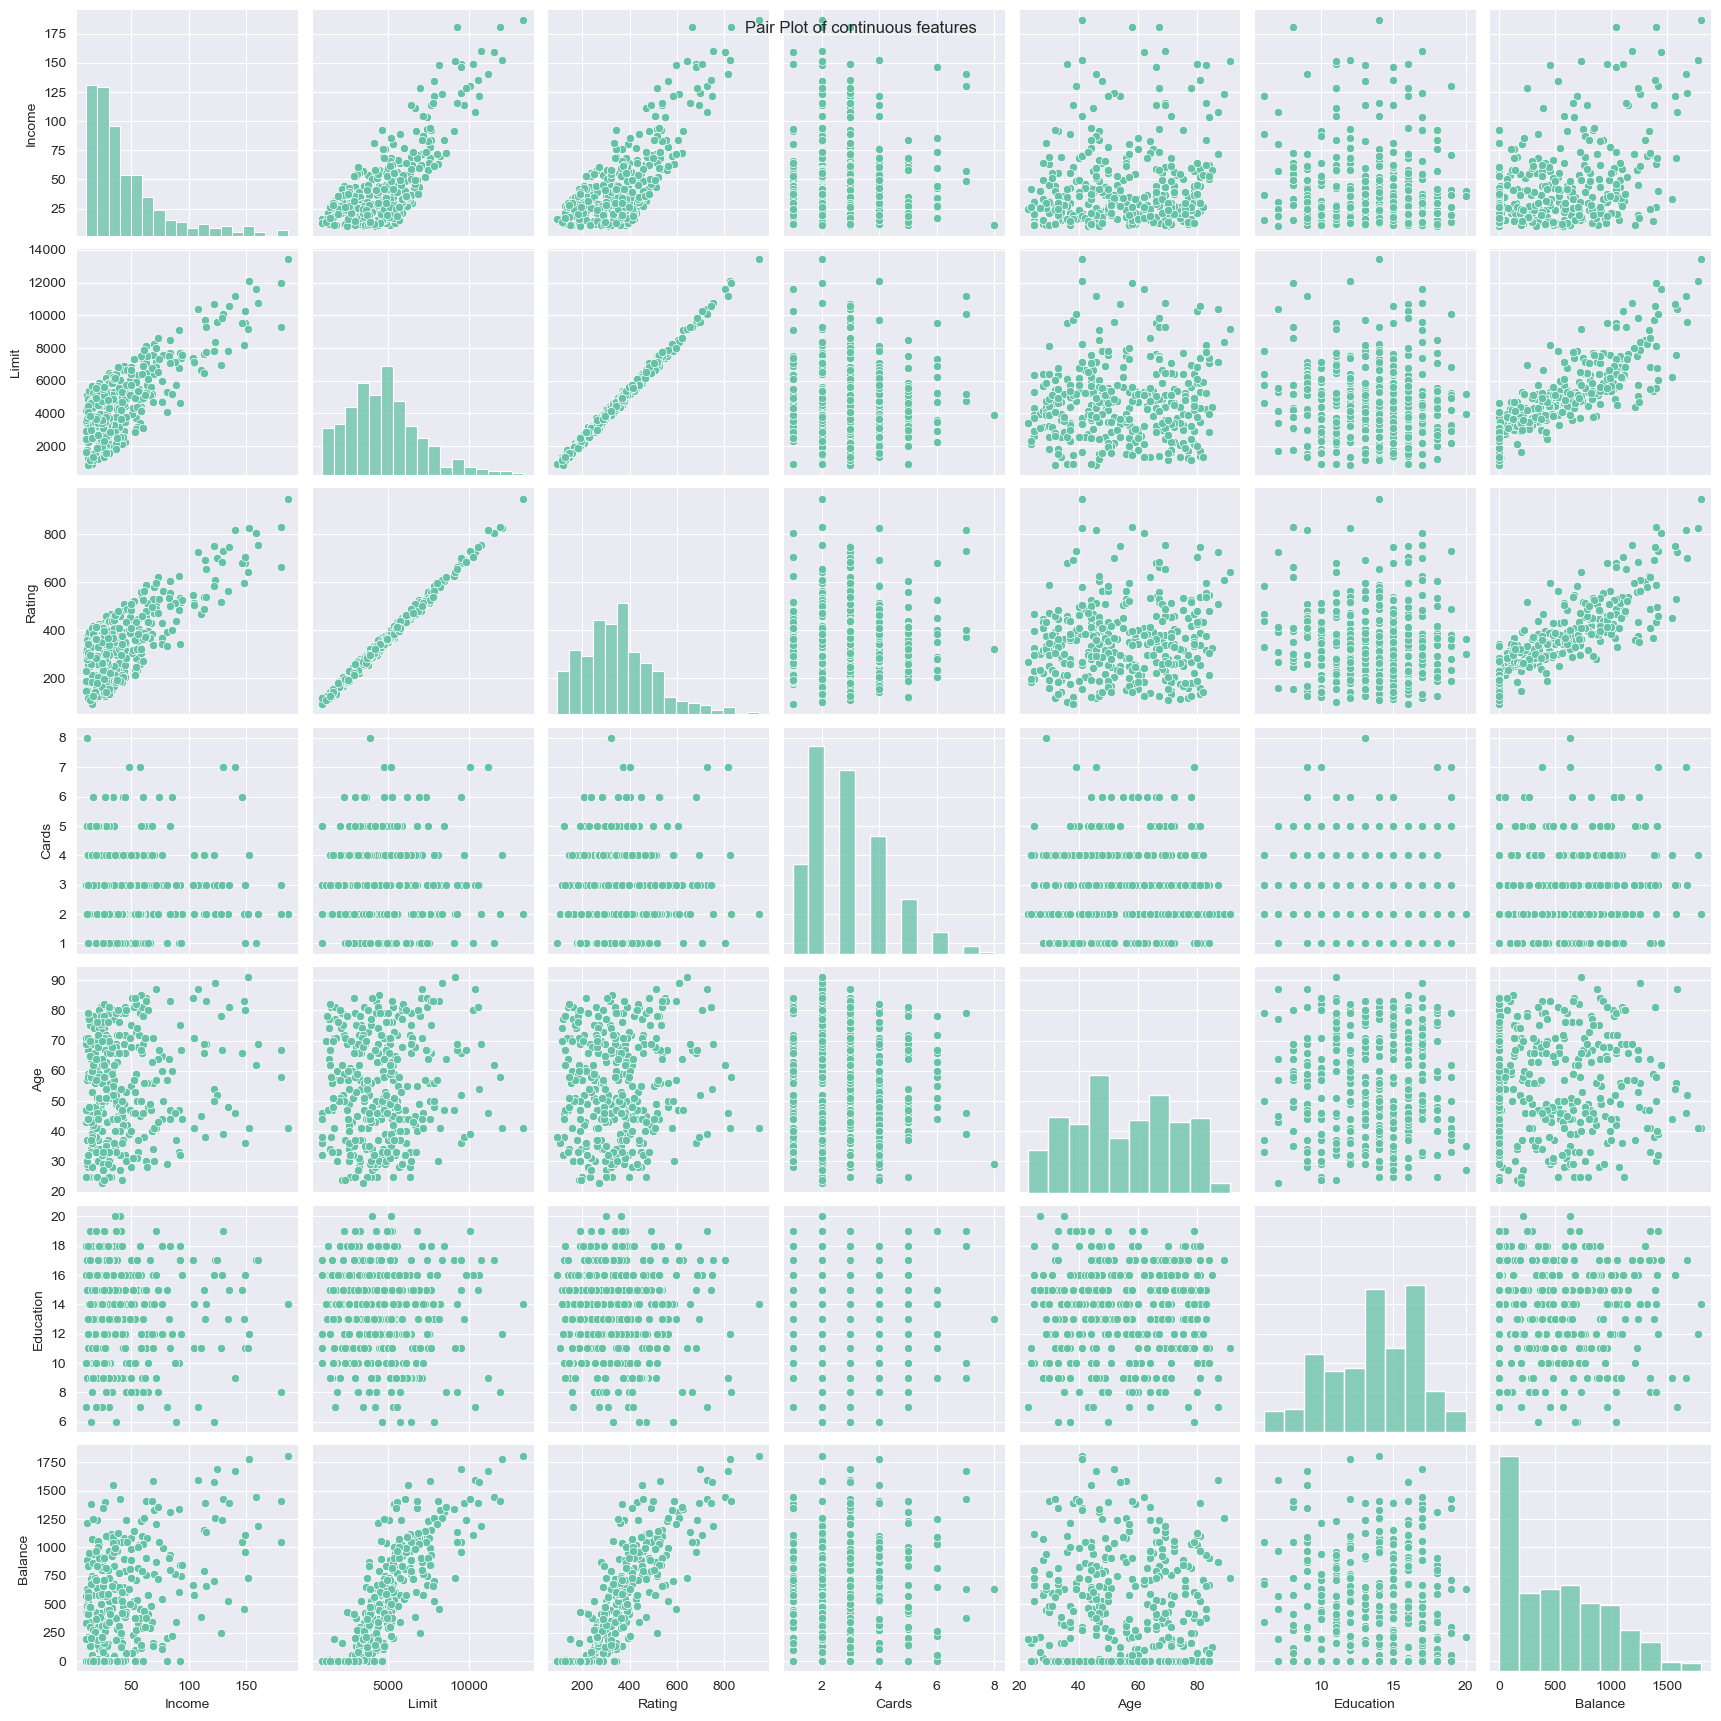

In [106]:
continuous_cols = df2_train.columns[1:8]
plt.figure()
sns.pairplot(df2_train[continuous_cols])
plt.suptitle('Pair Plot of continuous features')
plt.show()

C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Figure size 640x480 with 0 Axes>

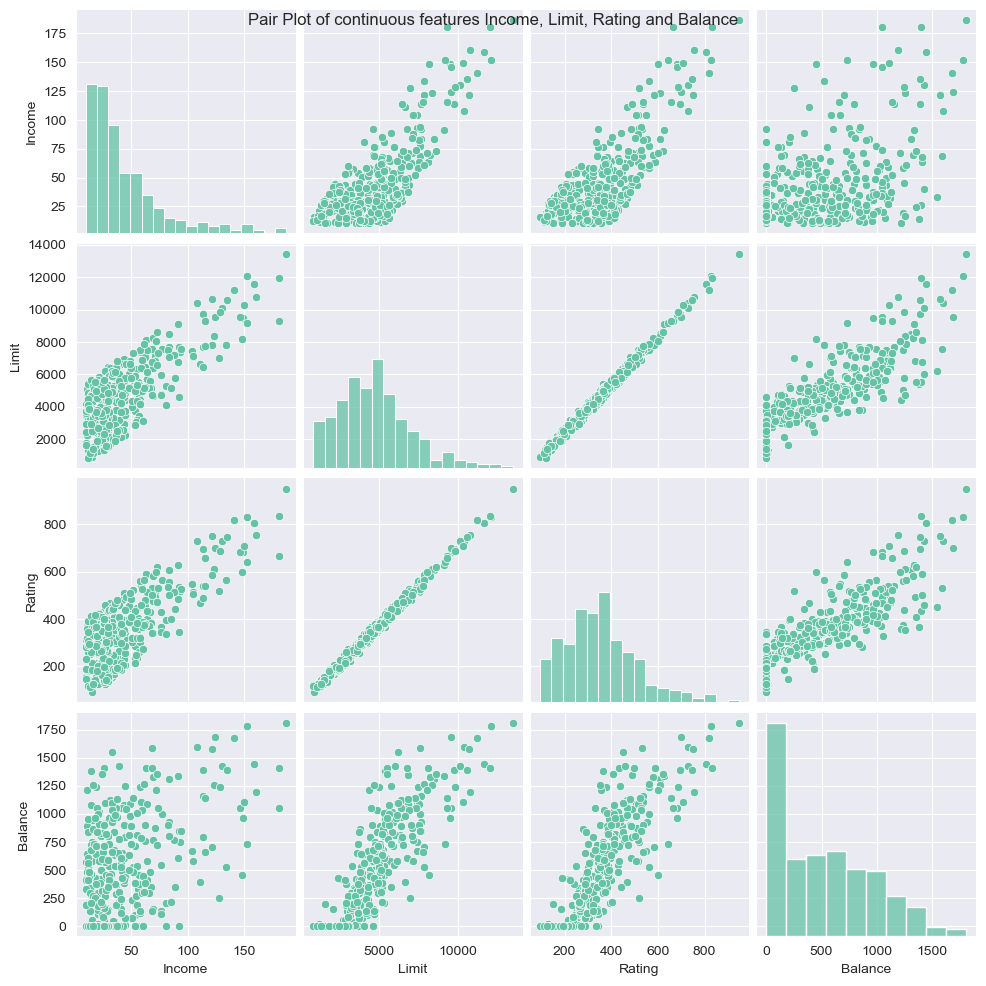

In [107]:
continuous_cols = ['Income', 'Limit', 'Rating', 'Balance']
plt.figure()
sns.pairplot(df2_train[continuous_cols])
plt.suptitle('Pair Plot of continuous features Income, Limit, Rating and Balance')
plt.show()

Findings: 
* There is a very high correlation between Limit and Rating 
* There is also a high correlation between Income and Limit as well as Income and Rating
* This can also seen in the third paragraph below

C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

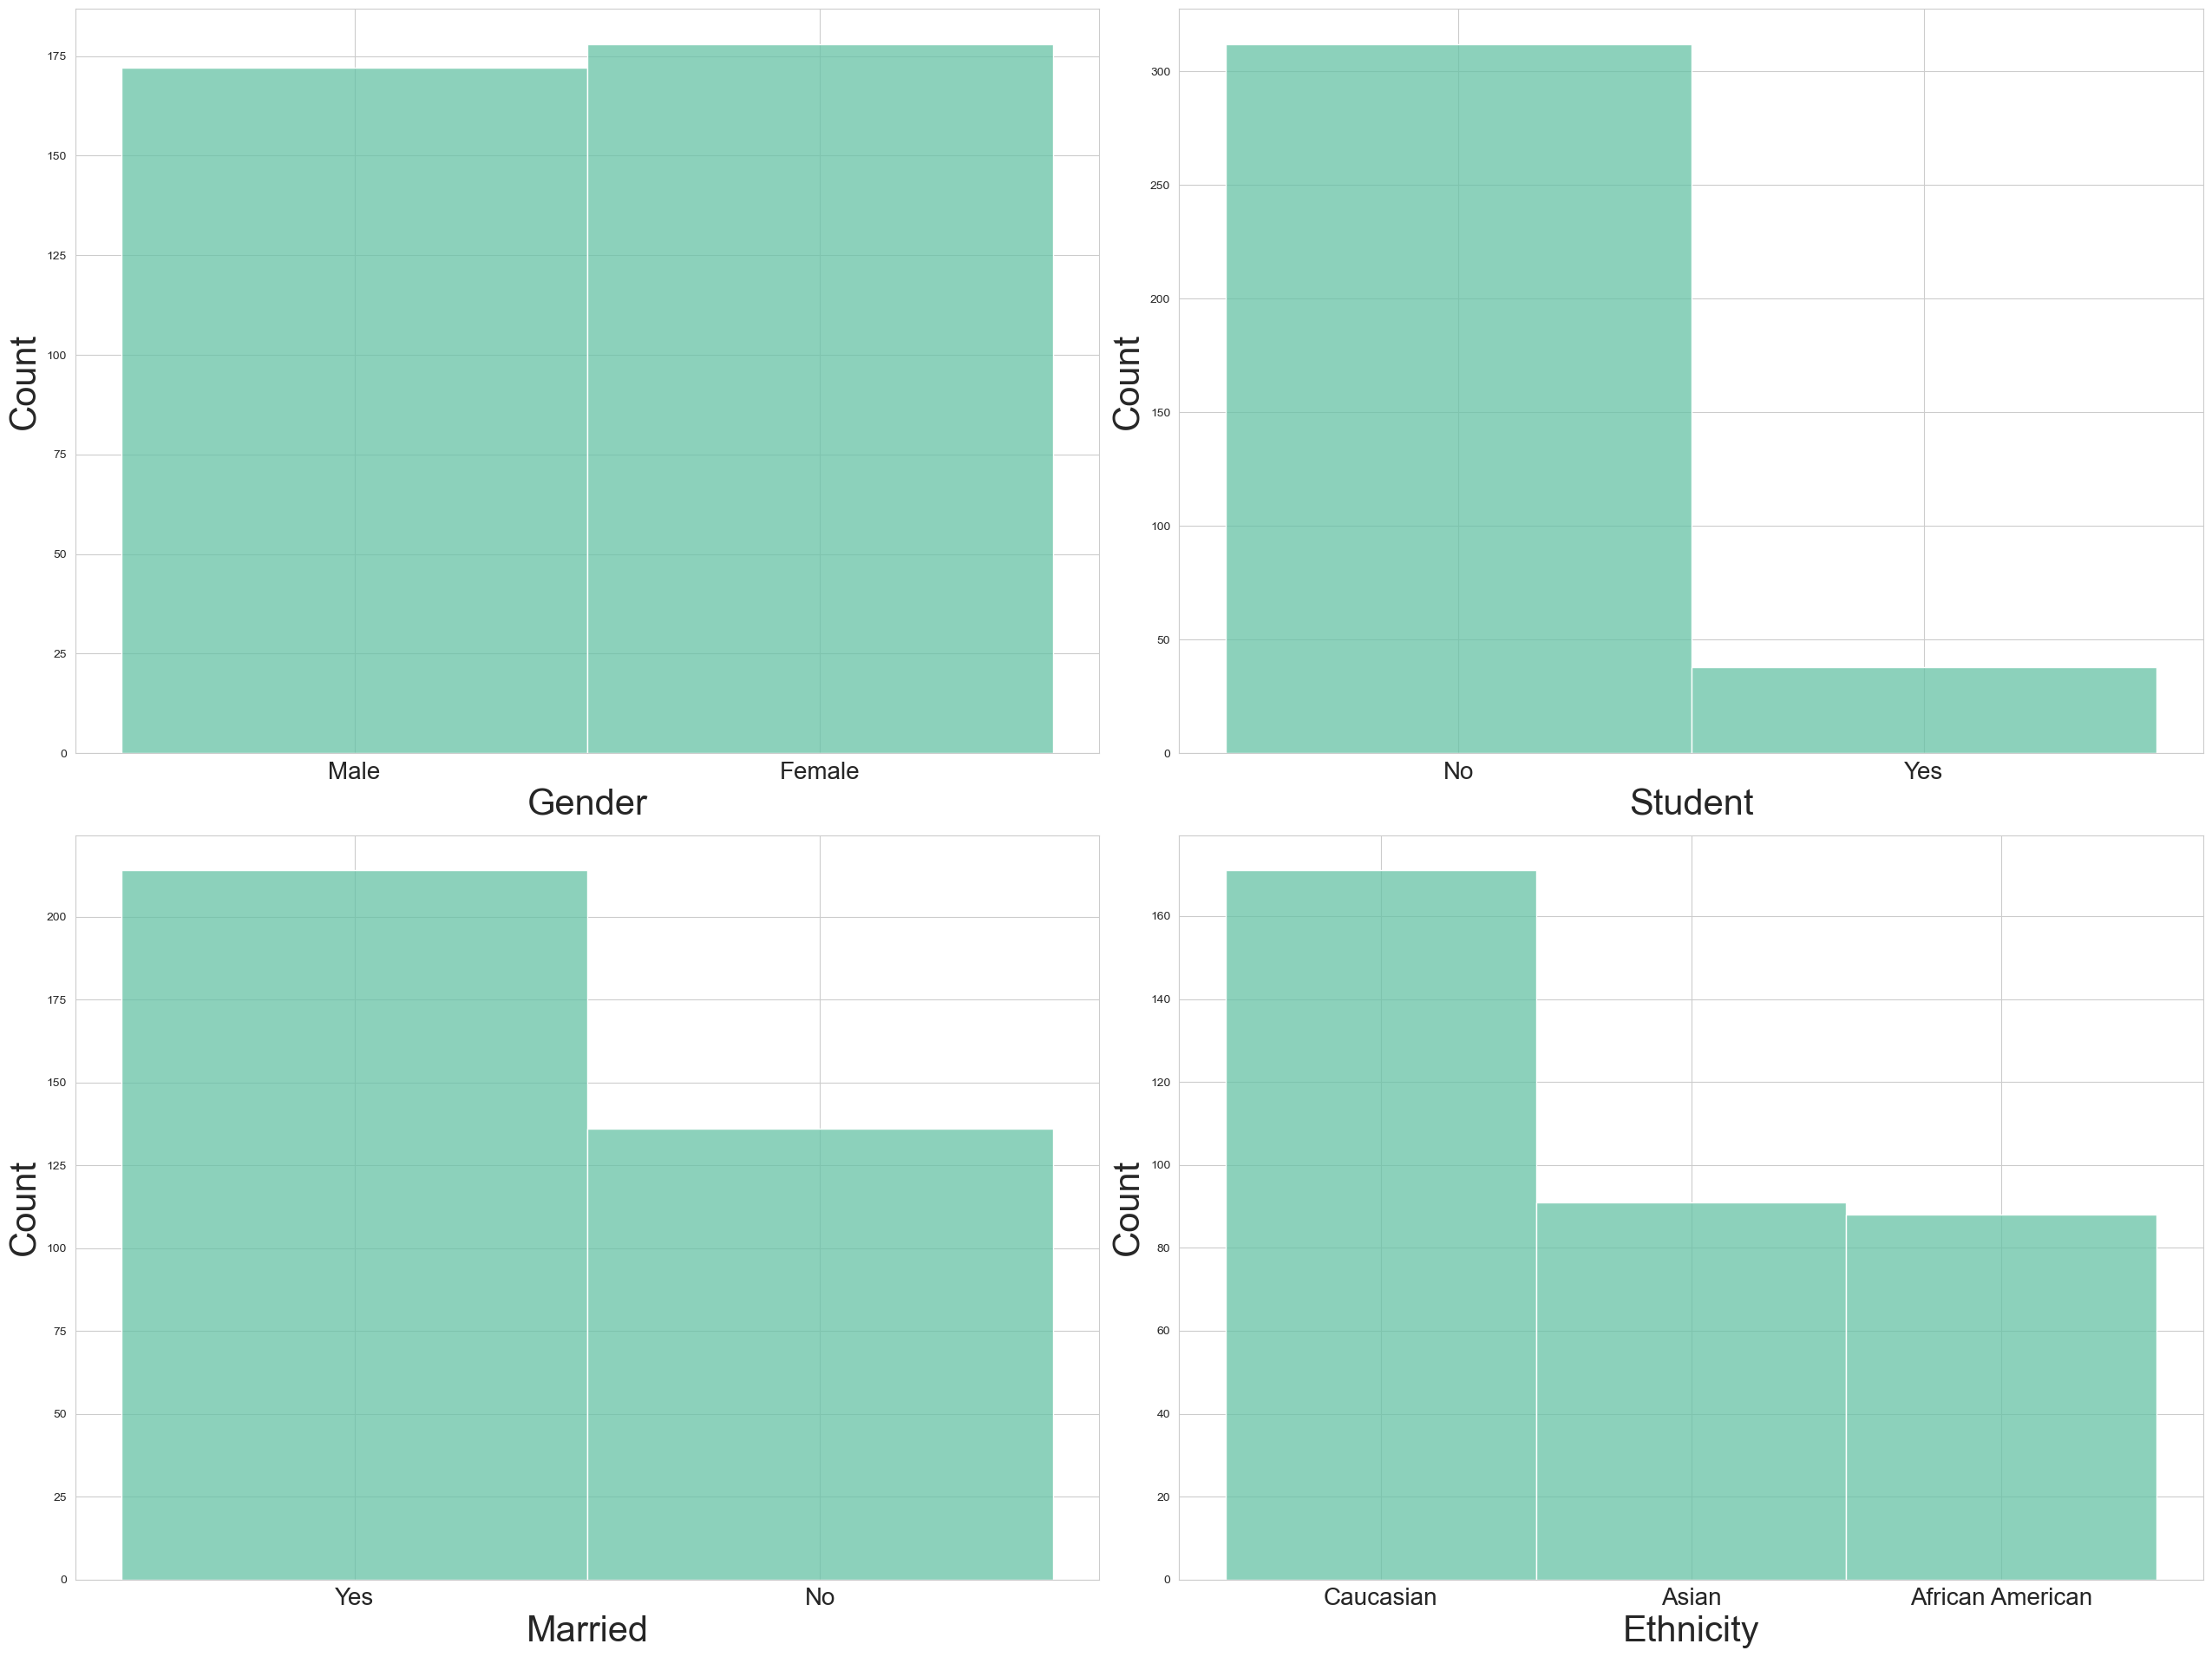

In [87]:
# Plot count plots for categorical variables
categorical_cols = df_train.columns[7:11]

import numpy as np
sqr_n= round(np.sqrt(len(categorical_cols)))

plt.figure(figsize=(25.6, 19.2))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(sqr_n,sqr_n,i)
    sns.histplot(df_train[col])
    plt.xlabel(col, fontsize=30)  
    plt.ylabel('Count', fontsize=30)  
    plt.xticks(fontsize=20)
plt.tight_layout()
plt.show()

C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

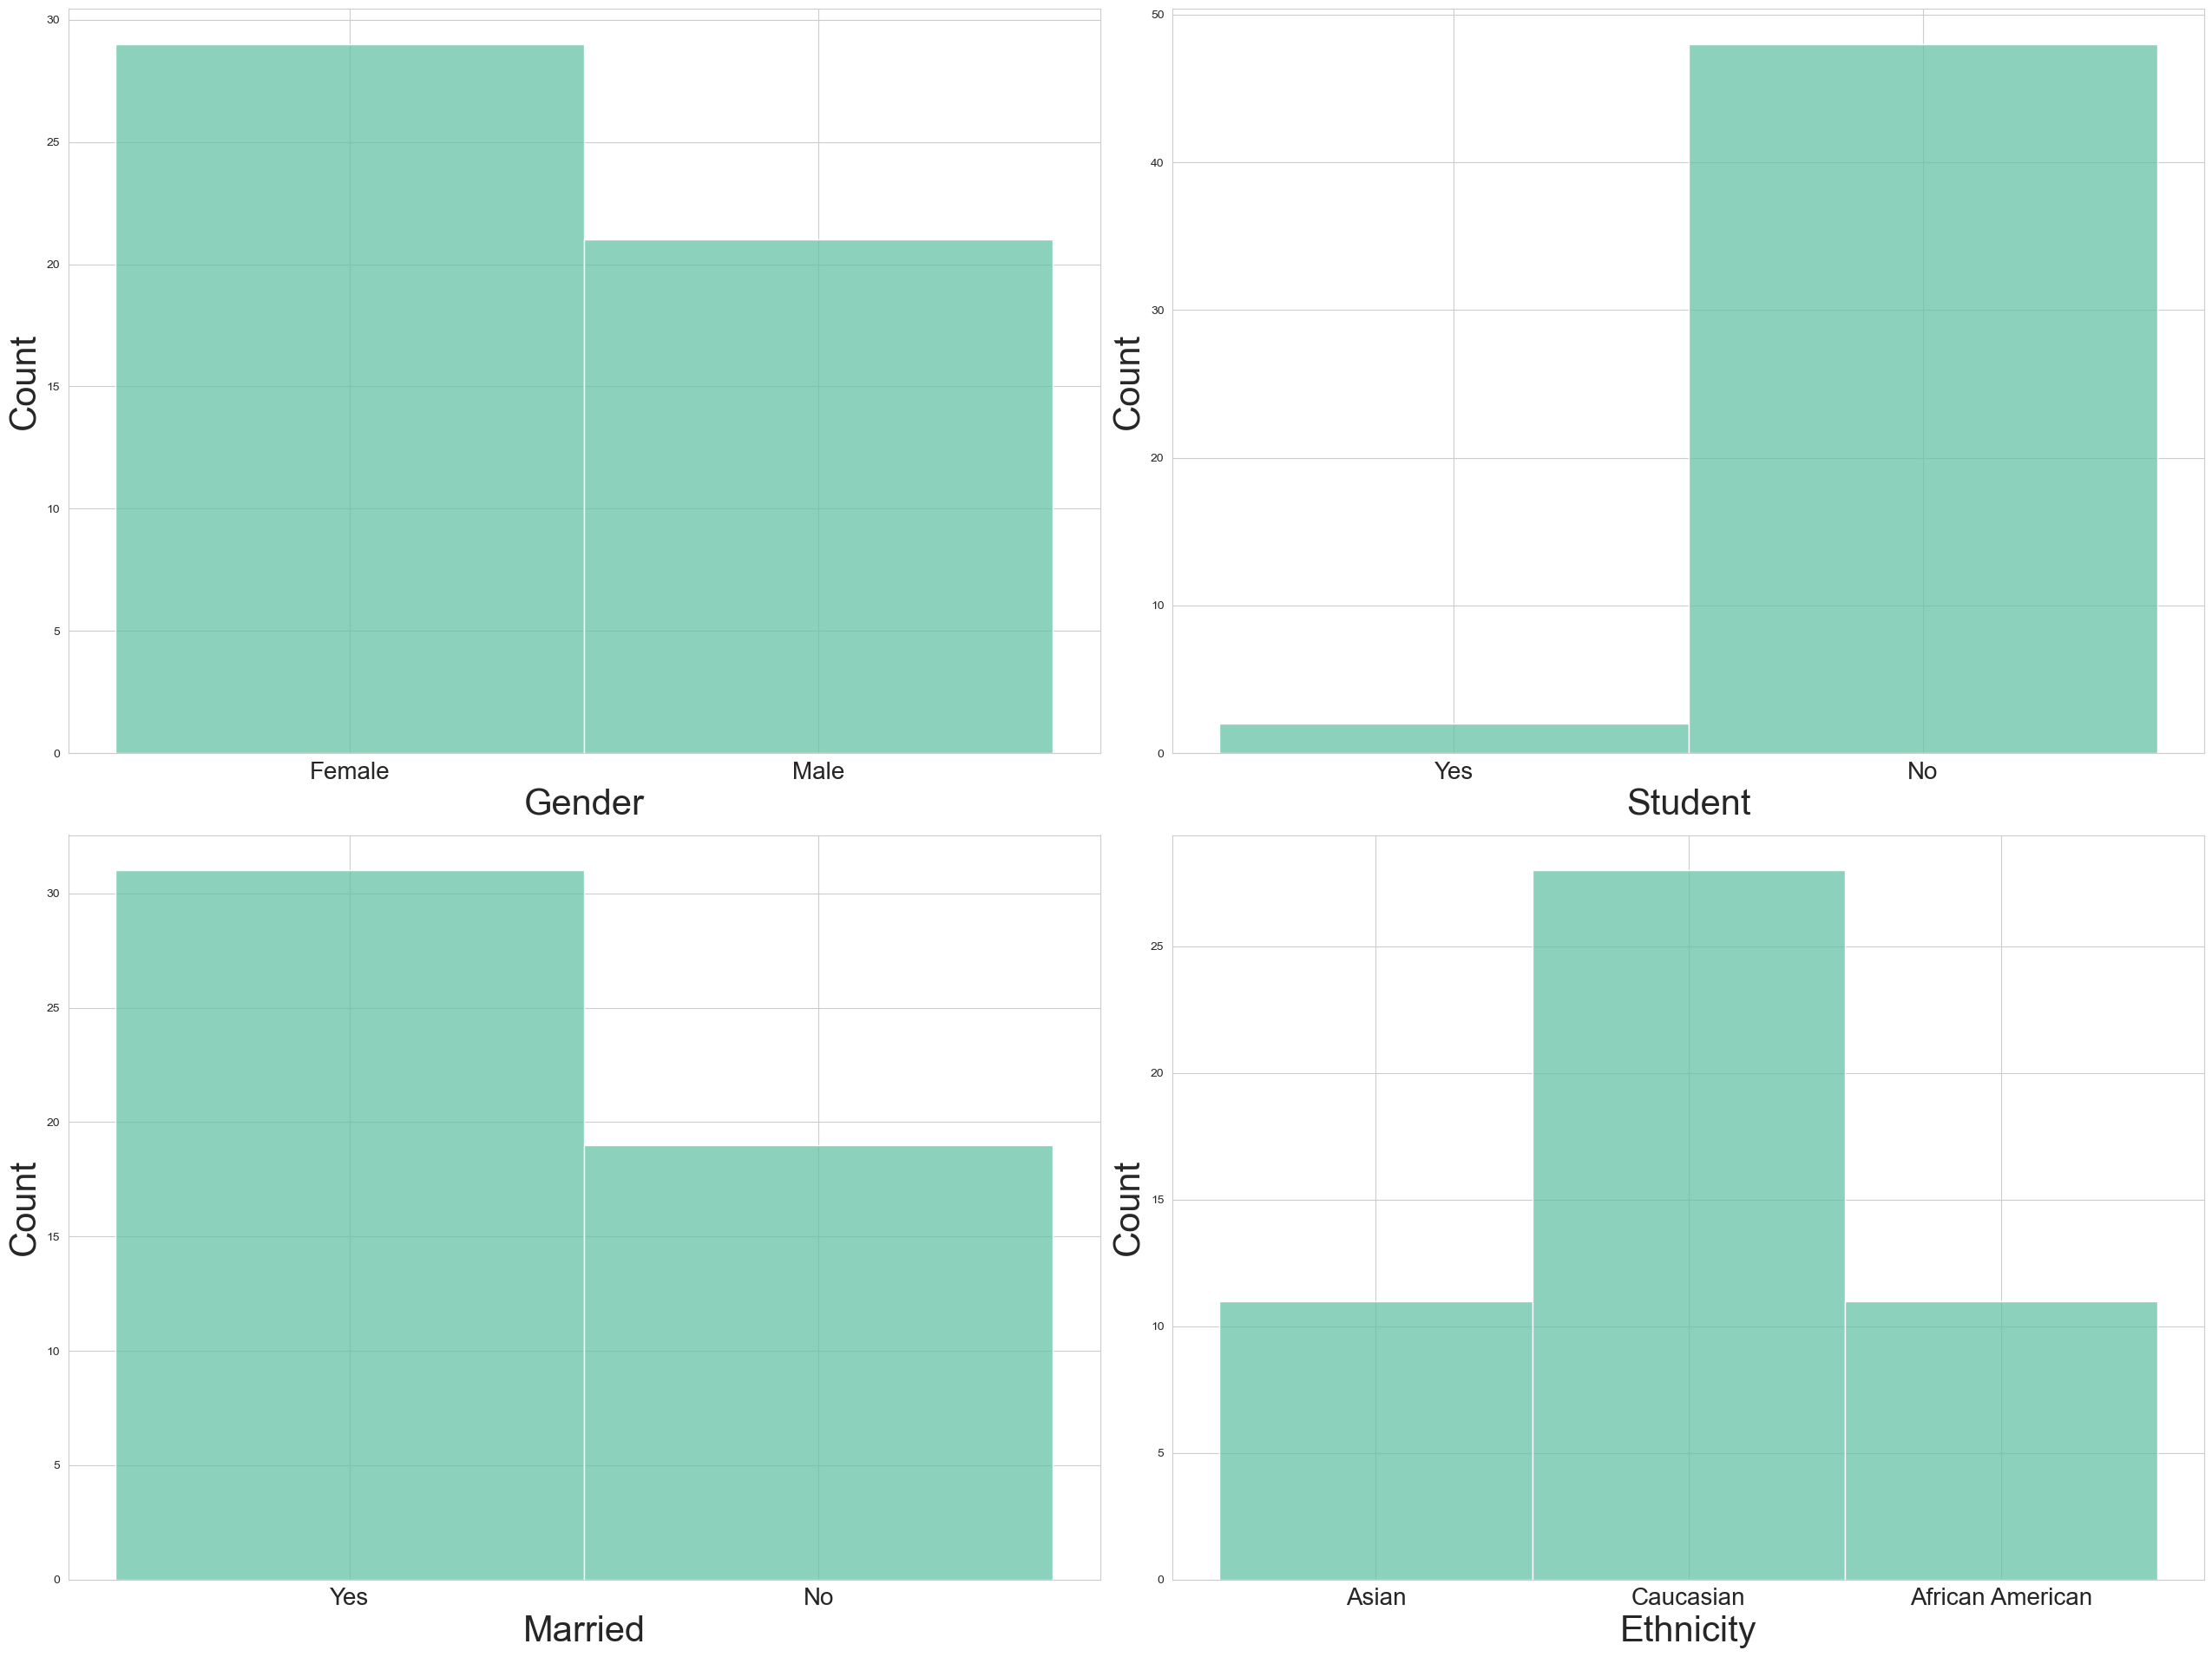

In [89]:
# Plot count plots for categorical variables
categorical_cols = df_test.columns[7:11]

import numpy as np
sqr_n= round(np.sqrt(len(categorical_cols)))

plt.figure(figsize=(25.6, 19.2))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(sqr_n,sqr_n,i)
    sns.histplot(df_test[col])
    plt.xlabel(col, fontsize=30)  
    plt.ylabel('Count', fontsize=30)  
    plt.xticks(fontsize=20)
plt.tight_layout()
plt.show()

Findings: 
* The train and test datasets are unevenly distributed for the attributes of Student, Married, and Ethnicity.

### 3. Remove highly uncorrelated features

In [100]:
correlation_matrix = df2_train.corr()
print(correlation_matrix)

                            Unnamed: 0    Income     Limit    Rating  \
Unnamed: 0                    1.000000  0.018656  0.028861  0.026436   
Income                        0.018656  1.000000  0.787706  0.786084   
Limit                         0.028861  0.787706  1.000000  0.996680   
Rating                        0.026436  0.786084  0.996680  1.000000   
Cards                        -0.040355 -0.024578  0.023752  0.067453   
Age                           0.042367  0.141492  0.073038  0.073738   
Education                    -0.010970 -0.054004 -0.037256 -0.043391   
Balance                       0.021100  0.450618  0.854554  0.857591   
Gender_Female                -0.122380  0.010270  0.033718  0.034383   
Student_Yes                  -0.030646  0.014957  0.001068  0.005979   
Married_Yes                   0.018293  0.002618 -0.012239 -0.007330   
Ethnicity_African American   -0.037293  0.060551  0.040555  0.041695   
Ethnicity_Asian              -0.020766 -0.005039 -0.023267 -0.02

In [81]:
correlation_matrix = df2_train.corr()

# Select features with a certain correlation threshold
correlation_threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix['Balance']) > correlation_threshold].index

df3_train = pd.concat([df2_train['Unnamed: 0'], df2_train[selected_features]], axis=1)
df3_test = pd.concat([df2_test['Unnamed: 0'], df2_test[list(filter(lambda x: x!= 'Balance', selected_features))]], axis=1)
print(df3_train.head())
print(df3_test.head())

   Unnamed: 0   Income  Limit  Rating  Cards  Balance  Student_Yes
0           1   14.891   3606     283      2      333        False
1           3  104.593   7075     514      4      580        False
2           4  148.924   9504     681      3      964        False
3           5   55.882   4897     357      2      331        False
4           7   20.996   3388     259      2      203        False
   Unnamed: 0   Income  Limit  Rating  Cards  Student_Yes
0           2  106.025   6645     483      3         True
1           6   80.180   8047     569      4        False
2          21   17.700   2860     235      4        False
3          31   34.142   5666     413      4        False
4          44   36.929   6257     445      1        False


C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Johannes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

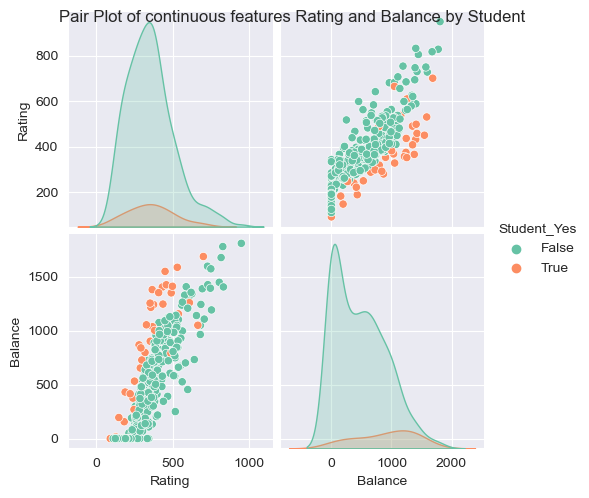

In [111]:
continuous_cols = ['Rating', 'Balance', 'Student_Yes']
plt.figure()
sns.pairplot(df2_train[continuous_cols], hue='Student_Yes')
plt.suptitle('Pair Plot of continuous features Rating and Balance by Student')
plt.show()

Findings: 
* Between Student and Rating is nearly no correlation 
* But between Student and Balance is a low correlation with 0.287136 (see first entry from this chapter)

### Save datasets in processed

In [82]:
df3_train.to_csv(target_dir + train_dataset_name.split(sep='/')[-1], index=False)
df3_test.to_csv(target_dir + test_dataset_name.split(sep='/')[-1], index=False)

In [83]:
df2_train.to_csv(target_dir + train_dataset_name.split(sep='/')[-1].split(sep='.')[0] + '_all_features.csv', index=False)
df2_test.to_csv(target_dir + test_dataset_name.split(sep='/')[-1].split(sep='.')[0] + '_all_features.csv', index=False)